In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
url="https://raw.githubusercontent.com/pallavi2200/house-price-prediction/main/housing%20dataset/Housing.csv"
data = pd.read_csv(url)
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
data['mainroad'] = data['mainroad'].replace({'yes':1,'no':0}).astype(int)
data['guestroom'] = data['guestroom'].replace({'yes':1,'no':0}).astype(int)
data['basement'] = data['basement'].replace({'yes':1,'no':0}).astype(int)
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes':1,'no':0}).astype(int)
data['airconditioning'] = data['airconditioning'].replace({'yes':1,'no':0}).astype(int)
data['prefarea'] = data['prefarea'].replace({'yes':1,'no':0}).astype(int)
data['furnishingstatus'] = data['furnishingstatus'].replace({'furnished':2,'semi-furnished':1, 'unfurnished':0 }).astype(int)

In [36]:
data.head()

# Split the data into features (X) and target (y)
X = data[['area',	'bedrooms',	'bathrooms',	'stories',	'mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning',	'parking',	'prefarea',	'furnishingstatus']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
predicted_prices = model.predict(X)

In [42]:
print(predicted_prices)

[ 8004072.41154001 10563592.0699829   7515542.71619024  8235633.44152229
  6497136.86443564  8411799.41857193  9570600.29915353  8556533.71727551
  7287415.69009749  7524449.64983626  8178523.16820284  8048399.75418243
  6956507.1833736   5945751.1324833   6161436.56244947  4933137.14530295
  7384209.04804385  7956536.09630057  6457426.32302761  6847272.35065354
  5146218.0272683   6626162.31266615  5935167.4198354   6615395.63690565
  7214844.39891124  8016608.87225595  7961212.22580441  4507488.41464124
  7046218.20151084  7102025.7517219   7293996.86867461  6295248.55419885
  6773036.85275897  6836356.36771845  6213162.55520984  7602762.93861836
  7616694.76068857  8153034.97458223  6082149.4297657   7009335.02696999
  6158615.80785916  7630208.3575673   7059327.34074542  6449540.96165084
  7219732.14524154  6298780.85614322  7141157.65285394  7266964.33857734
  5114583.37477564  7082164.96379067  6904336.72923623  5699897.00099402
  7452878.91086809  6956045.59253875  6351460.97128

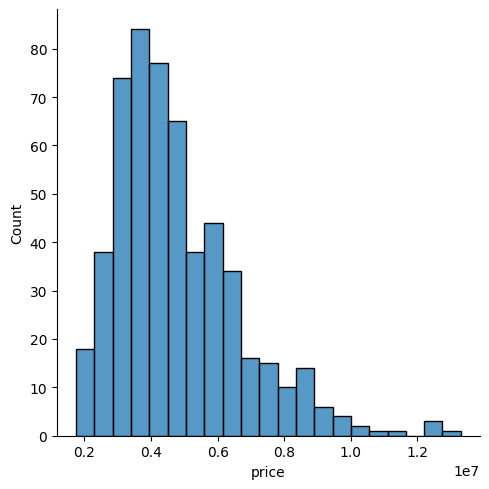

In [43]:
sns.displot(data['price'])

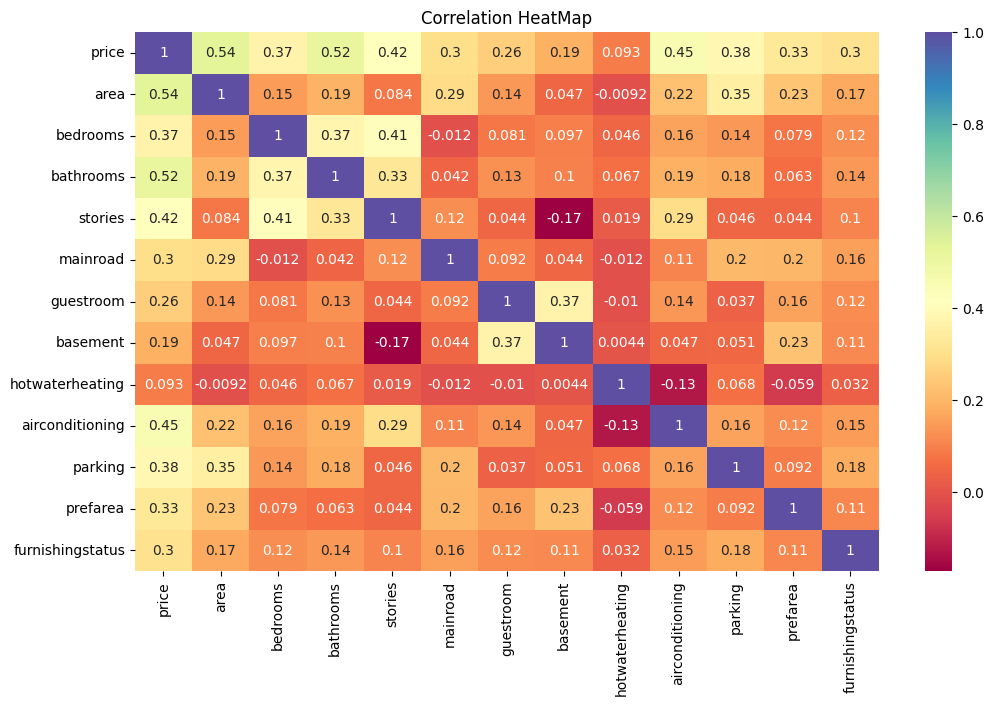

In [46]:
price_corr = data.corr()
plt.figure(figsize= (12,7))
sns.heatmap(price_corr,annot = True,  cmap='Spectral')
plt.title('Correlation HeatMap')
plt.show()

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1771751116594.04
R-squared: 0.65
